From the califorina housing data we are tyring to predict the median house values, given a number of features.
Data source = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQ9Hr8ST0QXLftoaF4txrzM8HRJJkmLkEgG16sJnP6YtCXwwTayDj0orEsUlm9UkiUgcRyiNy8I-yAe/pub?output=csv'

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ9Hr8ST0QXLftoaF4txrzM8HRJJkmLkEgG16sJnP6YtCXwwTayDj0orEsUlm9UkiUgcRyiNy8I-yAe/pub?output=csv")

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
median_house_value    20640 non-null int64
ocean_proximity       20640 non-null object
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


Here we have 10 columns (9 numercial and 1 categorical column). 20640 instances with 'total_bedrooms' attribute having missing values

In [5]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In 'Ocean_proximity' we have 5 categories and "<1H OCEAN" has the most instances i.e. 9136 whereas ISLAND" has the least instances i.e. 5 

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The attributes has different scale from each other and only 'total_bedrooms' attribute has missing values.

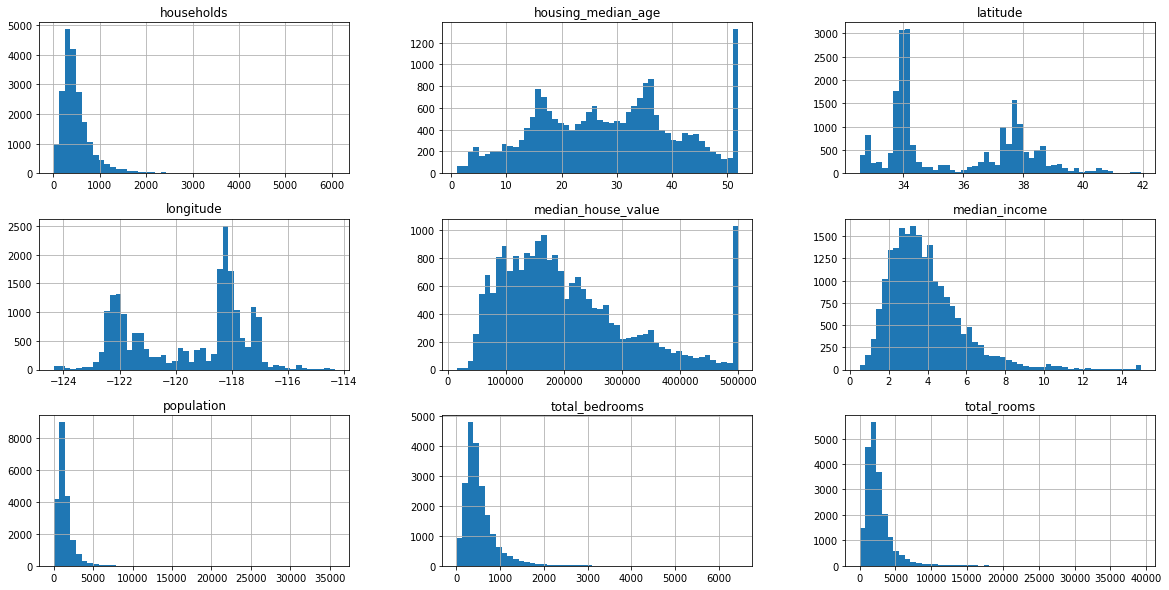

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,10))
plt.show()

'housing_median_age' & 'median_house_value' values are capped in the end and also most of the attributes are tail heavy distribution. The 'median_house_price' is the target variable so, if it's value are clapped in the end approximately around USD 500000. If the business if okay with the house price capped around 500000 then we dont have to modify our data but if, they want more precise values then we have to either recollect the house prices for such instances whose values got capped at 500000 or remove them form the training data as our model will not learn any value beyond that limit. Here for simplicity let's us assume that the Business is okay with  the house price capping at USD 500000 for all the houses whose prices are more than USD 500000

After having a overivew of the data let's divide this dataset into training and test (80% training and 20% test) without furture exploring the dataset to avoid the 'data snooping bias'. we will explore the training set.

In [8]:
import numpy as np

In [9]:
np.random.seed(121) #to keep the randomness constant

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=121)

In [12]:
len(train_set)

16512

From Exploratory Data Analysis 'median_income' seems to be important feature in pridicting the house price as, rich people can afford expensive houses. The test set should represent this wide range of 'median_income' which is present in the housing dataset else the model evluation on the test data will not be able to represent the true generilzed error and will be baised. so, we have to do a stratified sampling for the test set based on the 'median_income' attribute's interval. For that first we need to create a categorical attribute which will represent the 'median_income' attribute interval & then we will do a stratified sampling based on this new categorical attribute. 

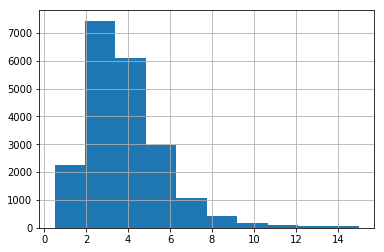

In [13]:
housing['median_income'].hist()

from the 'median_income' histogram it seems that the income starts from 1 and it's upto till 15. Here 1 unit = $10,000. For stratified sampling based on a attribute, it should be a categorical attribute but this attribute is a continous attribute so, one trick is to divide this continous attribute into some intervals and by recording the instance in that interval we can make a new categorical attribute. Let's call that new attribute as 'income_cat'

In [14]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [15]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

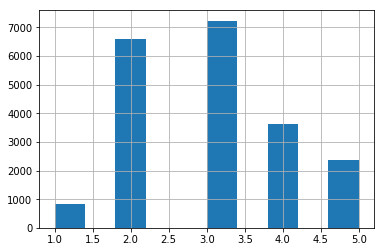

In [16]:
housing["income_cat"].hist()

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

In [18]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=121)

In [19]:
for train_index,test_index in split.split(housing,housing['income_cat']):
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]

Once we have done Stratified Sampling based on the income categories, delete the new 'income_cat' attribute as it whole purpose was just to help in sampling

In [20]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

E:\Anaconda\Anaconda1\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Exploring and visualizing the training set to gain insights

In [21]:
housing_train = strat_train_set.copy()

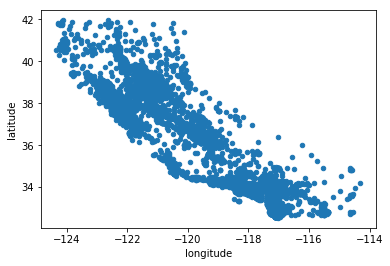

In [22]:
housing_train.plot(kind="scatter", x="longitude", y="latitude")

From this graph it is hard to infer which house are expensive and which are afforable, so, let's try a different graph

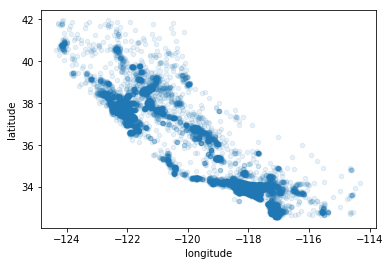

In [23]:
housing_train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

From the above graph, it seems like the houses near South Califorina cities like LA and San Diego area and also San Francisco Bay area  have most expensive houses. 

In [24]:
corr_matrix = housing_train.corr()

In [25]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.683284
total_rooms           0.130706
housing_median_age    0.107165
households            0.063209
total_bedrooms        0.047831
population           -0.026356
longitude            -0.045408
latitude             -0.144103
Name: median_house_value, dtype: float64

median_income,total_rooms,housing_median_age seems to have a strong postive relation with the target variable 'median_house_value' and population,longitude,latitude seems to have a negative  correlation with 'median_house_value'

Now let's explore the relations of few attributes(which have a positive relation with the target attribute) using scatter matrix

In [26]:
from pandas.plotting import scatter_matrix

In [27]:
attributes = ['median_income','total_rooms','housing_median_age','median_house_value']

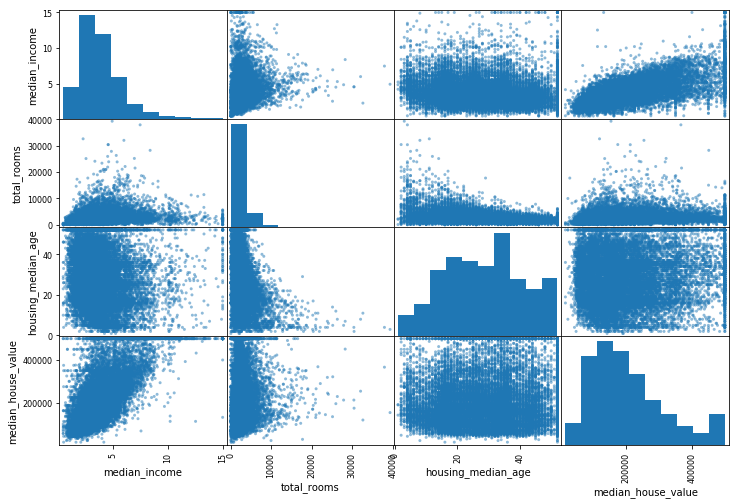

In [28]:
scatter_matrix(housing_train[attributes],figsize=(12,8))
plt.show()

All the three attribute 'median_income','total_rooms' & 'housing_median_age' values are capped at the end

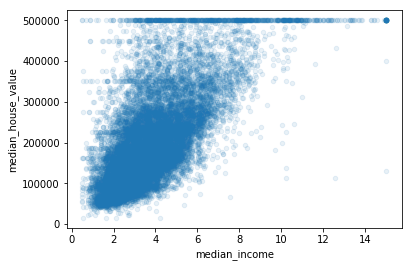

In [29]:
housing_train.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

It can be infer from the graph that as the median income increase the house prices also increases, most of the datapoints are around income 1 to income 6.5 and house prices corresponding to it are from USD 50,000 to USD 350,000. 
Also there is a capping of median house values around 500000

# Prepare Data for Machine Learning Algorithm

In [31]:
housing_train = strat_train_set.drop('median_house_value',axis=1) #reverting to training set 

In [32]:
housing_labels = strat_train_set['median_house_value'].copy()

Lets spearte the numercial attribute and the catogrical attribute from the trainig set to impute the numerical attributes based on 'median' and standraized it. Also convert catogrical attributes to numerical using OneHotEncoding.

In [33]:
housing_train_num = housing_train.drop('ocean_proximity',axis=1)

In [34]:
housing_train_cat = housing_train['ocean_proximity'].copy()

Let's creata a pipeline which will take care of both numerical and catogrical attribute at the same time and it's a good idea to transform the data using this pipeline before feeding it to the Machine Learning Algorithms as once the system goes into production new data may have missing values and also some ML Algo don't work with missing values. 

In [35]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [36]:
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])

In [37]:
num_attributes = list(housing_train_num)
col_attributes = ['ocean_proximity']

In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [39]:
full_pipeline = ColumnTransformer([
    ('num',num_pipeline,num_attributes),
    ('cat',OneHotEncoder(),col_attributes)
    ])

In [40]:
housing_train_prepared = full_pipeline.fit_transform(housing_train)

In [41]:
housing_train_prepared

array([[-0.87753009,  1.4290301 , -1.87566971, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.29623813, -0.74571084, -1.79620764, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.94306297, -0.92810847, -1.39889727, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.77306983,  1.53192107, -1.00158691, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.28645564,  0.19433847, -0.28642824, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.67445088, -0.77844888, -0.28642824, ...,  0.        ,
         0.        ,  0.        ]])

# Select and train a model

# Lineat Regression

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lin_reg = LinearRegression()

In [44]:
lin_reg.fit(housing_train_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

let's evaluate linear regression on training data with mean squared error and mean abosulte error cost function

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
lin_predictions = lin_reg.predict(housing_train_prepared)

In [47]:
lin_reg_mse = mean_squared_error(housing_labels,lin_predictions)

In [48]:
import numpy as np

In [49]:
lin_rmse = np.sqrt(lin_reg_mse)

In [50]:
lin_rmse

68983.14116314304

The RMSE of linear regression is 68983 i.e while prediciting the price for a house on average our model will predict either $68,983 more than the actual price or less than actual price. This is a big amount and this clearly shows linear regression here is underfitting the data. This is due to bad quality of data i.e too much of noise or our model is too simple to understand the underlying the pattern of the data so, lets try another machine learning model Decision Tree.

In [51]:
from sklearn.metrics import mean_absolute_error

In [52]:
lin_reg_mae = mean_absolute_error(housing_labels,lin_predictions)

In [53]:
lin_reg_mae

49981.549054908515

If we consider mean abosute error as cost function, still an error of $49981 is large amount hence let's consider another model

# Decision Tree Regressor

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [70]:
tree_reg = DecisionTreeRegressor(random_state=121)

In [71]:
tree_reg.fit(housing_train_prepared,housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=121, splitter='best')

In [72]:
tree_prediction = tree_reg.predict(housing_train_prepared)

In [73]:
tree_mse = mean_squared_error(housing_labels,tree_prediction)

In [74]:
tree_rmse = np.sqrt(tree_mse)

In [75]:
tree_rmse

0.0

Decision Tree model is clearly overfitting the data so much that the error is 0. Here, again the model is too complex for the data so, it is overfitting, let's regularized the decision tree model i.e. lets prune to reduce overfitting but before that let's try another machine learning model Random Forest on the same data and check the error.

# Random Forest Regressor

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
forest_reg = RandomForestRegressor(n_estimators=100,random_state=121)


In [63]:
forest_reg.fit(housing_train_prepared,housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=121, verbose=0,
                      warm_start=False)

In [64]:
forest_prediction = forest_reg.predict(housing_train_prepared)

In [65]:
forest_mse = mean_squared_error(housing_labels,forest_prediction)

In [66]:
forest_rmse = np.sqrt(forest_mse)

In [67]:
forest_rmse

18308.094009841654

Random Forest regression model has root mean squared eror of 18308 error i.e. this model is prediciting the price of the house either $18308 more than the actual price or less than the actual price. 

Random Forest's error is much less than the linear regression error of $68,983. Random forest regression model is clearly doing better than linear regression and also better from decision tree as decision tree is perfectly overfitting the data i.e. it's error is 0. But, we are not sure whether random forest has also overfitted the data or it's error are really low. 
So,Let's try one more algorithm  SVM.

# SVM

In [76]:
from sklearn.svm import SVR

In [77]:
svm_reg = SVR(kernel='linear')

In [78]:
svm_reg.fit(housing_train_prepared,housing_labels)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [79]:
svm_prediction = svm_reg.predict(housing_train_prepared)

In [80]:
svm_mse = mean_squared_error(housing_labels,svm_prediction)

In [81]:
svm_rmse = np.sqrt(svm_mse)

In [82]:
svm_rmse

111278.70210386047

SVM root mean square error is 111278 i.e. while pridicting the house price using SVM regression model we over estimate or under estimate the house price by $1,11,278 from the actual price which is a big difference. SVM is performing worse than the linear Regression or any other model we tried.

So, far we have trained all these models on entire training set and evaluated it on the same full training set, to summarized Linear regression is making $68,983 root mean squarred error, Decision Tree is perfectly overfitting the data & making no error, 

Random Forest is the best model amongst the model we tried and it is making an error of $18,308 which is small as compare to the 'median_house_price' the target variable's range. 

and lastly the SVM is making error of $1,11,278 which is worse than any other model we tried.
Let's try to train our model using Cross Validation, aiming to minimizing the generilzed error and to reduce the cost function.

# K fold Cross Valdiation 

In [84]:
from sklearn.model_selection import cross_val_score

In [85]:
lin_scores = cross_val_score(lin_reg,housing_train_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)

In [86]:
lin_rscores = np.sqrt(-lin_scores)

In [87]:
lin_rscores

array([71238.15774881, 69342.4289051 , 72309.34316864, 66328.41726178,
       68569.45101271, 69381.59370477, 69594.83324188, 67048.66205289,
       68851.63165132, 69265.49007314])

In [88]:
def display_score(score):
    print('scores: ',score)
    print('mean_score: ',score.mean())
    print('std_dev_score: ',score.std())
    

In [89]:
display_score(lin_rscores)

scores:  [71238.15774881 69342.4289051  72309.34316864 66328.41726178
 68569.45101271 69381.59370477 69594.83324188 67048.66205289
 68851.63165132 69265.49007314]
mean_score:  69193.0008821036
std_dev_score:  1656.147683477829


with 10 fold cross validation, the average of the root mean square errors using linear regression is $69,193 with standard deviation of 1656. 

In [90]:
tree_score = cross_val_score(tree_reg,housing_train_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)

In [91]:
tree_rscore = np.sqrt(-tree_score)

In [92]:
display_score(tree_rscore)

scores:  [70036.24911677 69525.51468817 69308.94705428 68651.24051249
 68458.20647989 71535.0178461  70584.94338395 67790.96228716
 67804.21768021 67960.24439668]
mean_score:  69165.5543445694
std_dev_score:  1204.0613548611464


with 10 fold cross validation, the average of the root mean square errors using Decision Tree regression is $69,165 with standard deviation of 1204. 

In [93]:
forest_score = cross_val_score(forest_reg,housing_train_prepared,housing_labels,scoring='neg_mean_squared_error',cv=5)

In [94]:
forest_rscore = np.sqrt(-forest_score)

In [95]:
display_score(forest_rscore)

scores:  [51749.83905894 49311.9548118  50611.42028158 47790.99964604
 49170.02490173]
mean_score:  49726.84774001612
std_dev_score:  1349.4189946622373


with 10 fold cross validation, the average of the root mean square error using Random Forest regression is $49,726 with standard deviation of 1349. 

In [96]:
svm_scores = cross_val_score(svm_reg,housing_train_prepared,housing_labels,cv=5,scoring='neg_mean_squared_error')

In [100]:
svm_rscore = np.sqrt(-svm_scores)

In [101]:
display_score(svm_rscore)

scores:  [110805.2489682  110184.71304991 114370.10386122 113165.12809013
 114256.23392866]
mean_score:  112556.28557962303
std_dev_score:  1745.905829585516


with 10 fold cross validation, the average of the root mean square error using SVM regression is $1,12,556 with standard deviation of 1745. 

Using 10 fold Cross validation to train different Machine learning models, Random forest again is doing better as compare to other. While prediciting the price of house using random forest algo which is trained using 10 fold cross validation over estimates or under estimate the price by mean of $49,726 and stadard devation of 1349. This error is high as compare to random forest which is trained on entire trainin set but this model tends to generalized more. 

So, after checking erros of various models on entire traing set and also using 10 fold cross validation, in both the cases Random Forest performs much better as others so, we are finalizing our final model to predict the housing price as Random Forest.

Let's search for best hyperparameters of Random Forest using Grid Search CV

# Grid Search with k-fold Cross Validation

In [102]:
from sklearn.model_selection import GridSearchCV

In [156]:
param_grid = [{'n_estimators':[185,195,200],'max_features':[6,8,10]},
         {'bootstrap':[False],'n_estimators':[185,195],'max_features':[4,6,8]},]

In [157]:
forest_reg = RandomForestRegressor(random_state=121)

In [158]:
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',
                           return_train_score=True)

In [159]:
grid_search.fit(housing_train_prepared,housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=121,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [6, 8, 10],
   

In [161]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 6, 'n_estimators': 195}

From the GridSearch 5 fold cross validation the best hyper-parameters for random foreset are max_features = 6 & n_estimators = 195

we can also have a look at the scores of each hyperparameter combination tested during the grid search:

In [162]:
cv_res = grid_search.cv_results_
for mean_score,params in zip(cv_res['mean_test_score'],cv_res['params']):
    print(np.sqrt(-mean_score),params)

49061.48955335114 {'max_features': 6, 'n_estimators': 185}
49029.96085241429 {'max_features': 6, 'n_estimators': 195}
49033.25890820022 {'max_features': 6, 'n_estimators': 200}
49146.20720541683 {'max_features': 8, 'n_estimators': 185}
49102.24951346433 {'max_features': 8, 'n_estimators': 195}
49119.390261501336 {'max_features': 8, 'n_estimators': 200}
49241.232769140566 {'max_features': 10, 'n_estimators': 185}
49243.95040878514 {'max_features': 10, 'n_estimators': 195}
49231.479708796236 {'max_features': 10, 'n_estimators': 200}
48928.006146080785 {'bootstrap': False, 'max_features': 4, 'n_estimators': 185}
48924.57297329502 {'bootstrap': False, 'max_features': 4, 'n_estimators': 195}
48721.22452942136 {'bootstrap': False, 'max_features': 6, 'n_estimators': 185}
48690.9516375354 {'bootstrap': False, 'max_features': 6, 'n_estimators': 195}
49359.55133994282 {'bootstrap': False, 'max_features': 8, 'n_estimators': 185}
49360.58486772279 {'bootstrap': False, 'max_features': 8, 'n_estimat

GridSearch using 5 fold cross validation to find the best hyper-parameters for random foreset takes long time. Instead we can use Randomized Search using kfold cross validation to find the best hyper-parameters of random foreset

# Randomized Search with k-fold Cross Validation

In [148]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [150]:
param_distribs = {
    'n_estimators':randint(low=1,high=200),
    'max_features':randint(low=1,high=8),
}
forest_reg = RandomForestRegressor(random_state=124)

In [151]:
rand_search = RandomizedSearchCV(forest_reg,param_distributions = param_distribs,cv=5,
                                 scoring='neg_mean_squared_error',n_iter=10,random_state=124)

In [152]:
rand_search.fit(housing_train_prepared,housing_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [163]:
rand_search.best_params_

{'max_features': 6, 'n_estimators': 189}

In [164]:
cv_res_randSearch = rand_search.cv_results_

In [165]:
for mean_score_randsearch,params_randsearch in zip(cv_res_randSearch['mean_test_score'],
                                                   cv_res_randSearch['params']):
    print(np.sqrt(-mean_score_randsearch),params_randsearch)

49206.425164392276 {'max_features': 7, 'n_estimators': 157}
51472.65106337988 {'max_features': 2, 'n_estimators': 136}
50259.06295002561 {'max_features': 3, 'n_estimators': 170}
54020.801788500336 {'max_features': 1, 'n_estimators': 117}
50584.474214965434 {'max_features': 5, 'n_estimators': 29}
50376.162643536874 {'max_features': 7, 'n_estimators': 22}
49200.20285509967 {'max_features': 6, 'n_estimators': 189}
49921.326862346126 {'max_features': 4, 'n_estimators': 74}
49330.611708511264 {'max_features': 7, 'n_estimators': 95}
49702.463314666194 {'max_features': 7, 'n_estimators': 49}


we can also check the feature importance using girdsearch kfold cross validation random forest as it assigns a score to each feature

In [171]:
feature_importance = grid_search.best_estimator_.feature_importances_

In [172]:
feature_importance

array([1.25907387e-01, 1.18956983e-01, 4.68665161e-02, 3.47634409e-02,
       2.88893889e-02, 4.10062631e-02, 2.66841936e-02, 4.03557624e-01,
       1.52650332e-02, 1.47755133e-01, 3.20185552e-04, 3.24211077e-03,
       6.78574071e-03])

In [185]:
cat_encoder = full_pipeline.named_transformers_['cat']
cat_attributes = list(cat_encoder.categories_[0])
num_attributes = list(housing_train_num)
attributes = num_attributes+cat_attributes
sorted(zip(feature_importance,attributes),reverse=True)

[(0.40355762370844334, 'median_income'),
 (0.1477551334007571, 'INLAND'),
 (0.12590738682324745, 'longitude'),
 (0.11895698320360269, 'latitude'),
 (0.04686651613638709, 'housing_median_age'),
 (0.04100626305892279, 'population'),
 (0.03476344094793704, 'total_rooms'),
 (0.02888938885507533, 'total_bedrooms'),
 (0.026684193633907668, 'households'),
 (0.015265033200096175, '<1H OCEAN'),
 (0.0067857407108687425, 'NEAR OCEAN'),
 (0.00324211076906507, 'NEAR BAY'),
 (0.0003201855516895813, 'ISLAND')]

From the above output, we can infer that as per random forest, median_income is the most importance attribute in predicting the median_house_price as it has the highest score also along with it attributes like INLAND,longitude & latitude are also important as their score are more than 10%.

As we have finalized the Random Forest regression model and it's hyper paramenter from grid search 10 fold cross validation. we will test this model on the test set to get a sense of how our model will makes generalized error i.e. error on new/unseen data. 

# Final model evaluating on Test set

In [186]:
final_model = grid_search.best_estimator_

In [187]:
final_model

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=195,
                      n_jobs=None, oob_score=False, random_state=121, verbose=0,
                      warm_start=False)

In [189]:
x_test = strat_test_set.drop('median_house_value',axis=1)
y_test = strat_test_set['median_house_value'].copy()
x_test_prepared  = full_pipeline.transform(x_test)

In [190]:
final_prediction = final_model.predict(x_test_prepared)

In [194]:
final_mse = mean_squared_error(y_test,final_prediction)

2221367470.5335684

In [196]:
final_rmse  = np.sqrt(final_mse)

In [197]:
final_rmse

47131.385196422656

This is the generized error our model makes on test set i.e. unseen data so we can expect approximately same error on average our model will make while prediciting on new data. 

Give the 'median_house_value' the target attribute range in the training set (max = USD 500,001 & min= USD 14,999 ) an average of errors made by our model on unseen data is approximately $47,131 , if busniness is okay with this amount of error, our model is ready to be deployed in production or else we have to tweak further our model to try to reduce the generalized error.

# Summary

We explore the data and got an idea about attributes & their distributions. 
Many attributes were tail heavy distribution and they all were on different scale. 
Also, we had a combinations of both numerical and categorical attributes. 
Some of the numerical attributes were having missing values and also we had to convert categorical attributes to numercial.

we also saw correaltion matrix between the target attribute 'median_house_price' and others attributes. Some attributes has a positive & strong correlation with the target attribute while some has negative correlation. 

we did stratified sampling on the data & split it into 80% training data and 20% testing data based on 'median_income' attribute's range as the 'median_income' attribute is the most important attribute in prediciting the house price. so, we want all the range of median_income in our test set.

we have imputed the missing value in numecial attribute using the median value and we have converted the categorical attribute to numercial attribute using OneHot Encoding.
We created a pipeline, which will accept a data and will fill the missing values in the numerical attributes with the imputed median values and will also convert the 
categorical attribute using OneHotEncoding and then will combine them all.

we have tried 4 algorithms Linear Regression,Decision Tree,Random Forest, SVM.
First we trained all these model on entire training set and then evaluate them on same entire training set. Decision tree is over fitting the data as it is making an error of 0 while SVM is performing worst whereas Random forest is the winner making lowest and modest error amonst all

Then we trained our machine learning models on 10 fold cross valdation set and then evaluate all these model using same 10 fold CV set. Again, Random forest is the winner making lowest and modest error amonst all so we have finalized random forest as our final model for predicting house price in Califorina

Random Forest has many hyper parameters so, to find the best hyper parameters we have used 5 fold Grid Search CV. But,this GridSearch CV was taking too much time and also whenever we want to change the range of hyperparameter it will take additional log times so, we tried a different approach i.e. Randomized Search with 5 fold cross validaion and 10 iterations to find the best parameters.

Finally, we tested on model on test set and got an approximation on generilized error. On average, our model is making $47,131 prediciton error.

# Problems faced during this project

While converting the catogrical attribute to dummy variable using OneHotEncoder,
the catorgical attributes has some missing values and OneHotEncoder will not work with missing values so we had to removed the entire instances whose categorical values are missing, here such examples were less so, we removed them but if such instances could have be more in number we could have to thought about another solution.

To select best hyper parameter of random forest, I had to rerun the GridSearchCV multiple times and each iteration use to take too much time so, the whole process took way too much time to find the best hyper parameter.

Based on correlation matrix, we were faced a tough choice of removing the least correalted attributes as they are not adding any values in predicting the target variables.
